In [104]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical #one hot encodeing
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

In [105]:
np.random.seed(0)

In [106]:
(X_train, y_train),(X_test,y_test) = mnist.load_data() #import 60kmnist images with label as training data also returns 10 k images into test dataset with their associated label

In [107]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [108]:

assert(X_train.shape[0]==y_train.shape[0]),"No. of images is not eqaual to no. of labels"
assert(X_test.shape[0]==y_test.shape[0]),"No. of images is not eqaual to no. of labels"
assert(X_train.shape[1:]==(28,28)),"Dimensions of image is not 28x28"
assert(X_test.shape[1:]==(28,28)),"Dimensions of image is not 28x28"

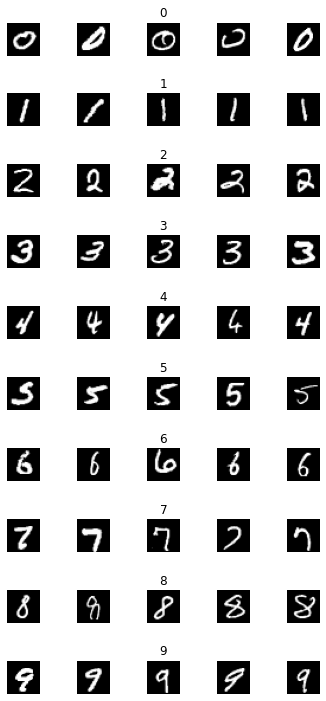

In [109]:
num_samples = []
cols = 5
num_classes = 10

fig,axs = plt.subplots(nrows=num_classes, ncols= cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
     
        x_selected = X_train[y_train == j]
        
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected -1)),:,:],cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2 :
            axs[j][i].set_title(str(j))
            num_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0.5, 1.0, 'Distribution of training data set')

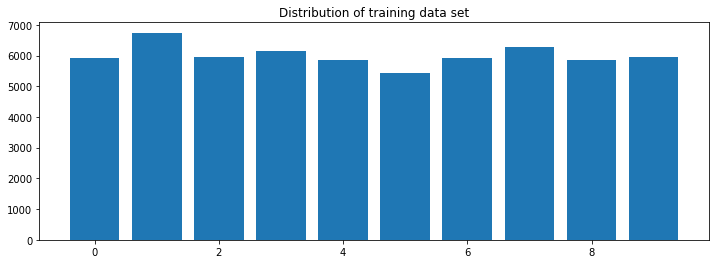

In [110]:
print(num_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_samples)
plt.title("Distribution of training data set")

In [111]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [112]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [113]:
X_train = X_train/255
X_test = X_test/255

In [114]:
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [115]:
model = leNet_model()
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               188000    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [116]:
history = model.fit(X_train,y_train, epochs= 25, validation_split =0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/25
135/135 [==============================] - 3s 15ms/step - loss: 0.4673 - accuracy: 0.8729 - val_loss: 0.1051 - val_accuracy: 0.9732
Epoch 2/25
135/135 [==============================] - 2s 13ms/step - loss: 0.0977 - accuracy: 0.9708 - val_loss: 0.0670 - val_accuracy: 0.9798
Epoch 3/25
135/135 [==============================] - 2s 13ms/step - loss: 0.0659 - accuracy: 0.9797 - val_loss: 0.0585 - val_accuracy: 0.9835
Epoch 4/25
135/135 [==============================] - 2s 13ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0457 - val_accuracy: 0.9878
Epoch 5/25
135/135 [==============================] - 2s 13ms/step - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.0377 - val_accuracy: 0.9890
Epoch 6/25
135/135 [==============================] - 2s 13ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0395 - val_accuracy: 0.9890
Epoch 7/25
135/135 [==============================] - 2s 13ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0363 - val_accuracy: 0.9903

Text(0.5, 0, 'epoch')

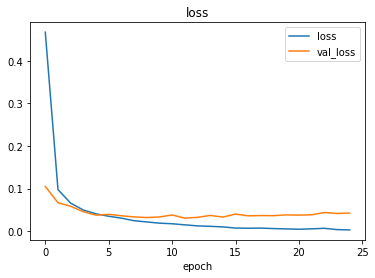

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

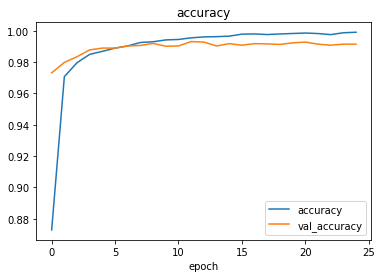

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

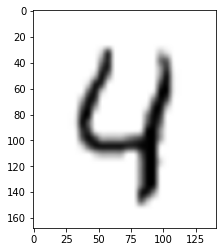

In [148]:

from PIL import Image
import requests
url = 'https://miro.medium.com/max/282/1*xpszL7jJrV5UTV7Xa-fgWQ.png'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
import cv2 
img_array = np.asarray(img)
resized = cv2.resize(img_array,(28,28))
grayscale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(grayscale)
print(grayscale.shape)
plt.imshow(img,cmap = plt.get_cmap("gray"))
print(img)

In [150]:
img= img/255
img = img.reshape(1,28,28,1)

In [151]:
np.argmax(model.predict(img), axis=-1)

array([4])